## Generative Adversarial Networks Tuturial with MNIST

Outline of the work:

* [Introduction](#1)
* [Packages & Libraries](#2)
* [Data Import](#3)
* [Create Model](#4)
    * [Create Generator](#5)
    * [Create Discriminator](#6)
    * [Create GAN Model](#7)
* [Training](#8)
* [Result](#9)

<a id = "1"></a>
### Introduction

<img src = "https://www.researchgate.net/publication/340458845/figure/fig1/AS:879437700669440@1586685695381/The-architecture-of-vanilla-GANs.ppm" width = "800" height = "500">

Generative Adversarial Networks, or GANs for short, are an approach to generative modeling using deep learning methods, such as convolutional neural networks.

Generative modeling is an unsupervised learning task in machine learning that involves automatically discovering and learning the regularities or patterns in input data in such a way that the model can be used to generate or output new examples that plausibly could have been drawn from the original dataset.

GANs are a clever way of training a generative model by framing the problem as a supervised learning problem with two sub-models: the generator model that we train to generate new examples, and the discriminator model that tries to classify examples as either real (from the domain) or fake (generated). The two models are trained together in a zero-sum game, adversarial, until the discriminator model is fooled about half the time, meaning the generator model is generating plausible examples.

<a id = "2"></a>
### Packages & Libraries

In [ ]:
from keras.layers import Dense, Dropout, Input, ReLU
from keras. models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

<a id = "3"></a>
### Data Import

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
print("X train shape: ", x_train.shape)
print("Y train shape: ", y_train.shape)
print("X test shape: ", x_test.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (60000, 28, 28)
Y train shape:  (60000,)
X test shape:  (10000, 28, 28)
Y test shape:  (10000,)


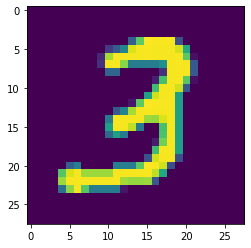

In [29]:
plt.imshow(x_train[107])

In [31]:
# x_train to (-1, 1)
x_train = (x_train.astype(np.float32)-127.5)/127.5

In [32]:
#reshape data
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print("X train shape: ", x_train.shape)
print("X test shape: ", x_test.shape)

X train shape:  (60000, 784)
X test shape:  (10000, 784)


<a id = "4"></a>
### Create Model

**GAN Model Architecture**

It comprises of 2 sub-models

* Generator:-It is a model that is used to produce probable examples from the domain of the question provided earlier. The model uses a stable length vector as input and produces the sample in the domain. The vector which is used here is selected in a whimsical manner from the Gaussian Distribution. After the completion of training, the multidimensional vector formed will resemble points in the problem, forming a flattened view of the provided data distribution.
* Discriminator:- It is a model that is used to categorize examples as genuine or fake.

<a id = "5"></a>
#### Create Generator

In [48]:
# create generator
def create_generator():
    
    generator = Sequential()
    generator.add(Dense(units = 512, input_dim = 100))
    generator.add(ReLU())
    
    generator.add(Dense(units = 512))
    generator.add(ReLU())
    
    generator.add(Dense(units = 1024))
    generator.add(ReLU())
    
    generator.add(Dense(units = 784, activation = "tanh"))
    
    generator.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.0001, beta_1 = 0.5))
    
    return generator

In [49]:
g = create_generator()
g.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               51712     
_________________________________________________________________
re_lu_15 (ReLU)              (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
re_lu_16 (ReLU)              (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1024)              525312    
_________________________________________________________________
re_lu_17 (ReLU)              (None, 1024)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 784)              

<a id = "6"></a>
#### Create Discriminator

In [52]:
# create discriminator
def create_discriminator():
    
    discriminator = Sequential()
    discriminator.add(Dense(units = 1024, input_dim = 784))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))
    
    discriminator.add(Dense(units = 512))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))
    
    discriminator.add(Dense(units = 256))
    discriminator.add(ReLU())
    
    discriminator.add(Dense(units = 1, activation = "sigmoid"))
    
    discriminator.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.0001, beta_1 = 0.5))
    
    return discriminator

In [53]:
d = create_discriminator()
d.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1024)              803840    
_________________________________________________________________
re_lu_21 (ReLU)              (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               524800    
_________________________________________________________________
re_lu_22 (ReLU)              (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)              

<a id = "7"></a>
#### Create GAN

In [54]:
# GANs
def create_gan(discriminator, generator):
    
    discriminator.trainable = False
    gan_input = Input(shape = (100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    
    gan = Model(inputs = gan_input, outputs = gan_output)
    
    gan.compile(loss = "binary_crossentropy", optimizer = "adam")
    
    return gan

In [55]:
gan = create_gan(d, g)
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_5 (Sequential)    (None, 784)               1643280   
_________________________________________________________________
sequential_7 (Sequential)    (None, 1)                 1460225   
Total params: 3,103,505
Trainable params: 1,643,280
Non-trainable params: 1,460,225
_________________________________________________________________


<a id = "8"></a>
### Training

In [56]:
epochs = 50
batch_size = 256

for e in range(epochs):
    for _ in range(batch_size):
        
        noise = np.random.normal(0, 1, [batch_size, 100])
        # generated image batch
        generated_images = g.predict(noise)
        # real image batch
        image_batch = x_train[np.random.randint(low = 0, high = x_train.shape[0], size = batch_size)]
        
        x = np.concatenate([image_batch, generated_images])
        # allocation discriminator predictions
        y_dis = np.zeros(batch_size * 2)
        y_dis[:batch_size] = 1
        
        d.trainable = True
        d.train_on_batch(x, y_dis)
        
        noise = np.random.normal(0, 1, [batch_size, 100])
        
        y_gen = np.ones(batch_size)
        
        d.trainable = False
        
        gan.train_on_batch(noise, y_gen)
    
    print("Epoch: ", e)

2022-11-18 09:54:13.149708: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49


<a id = "9"></a>
### Result

In [57]:
g.save_weights("gans_model.h5")

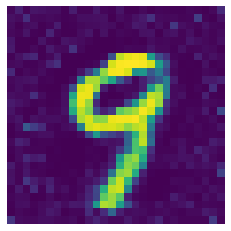

In [59]:
# a sample predicted image
noise = np.random.normal(loc = 0, scale = 1, size = [100, 100])
generated_images = g.predict(noise)
generated_images = generated_images.reshape(100, 28, 28)
plt.imshow(generated_images[66], interpolation="nearest")
plt.axis("off")
plt.show()